<h1 align="center"><font size="6" face="rockwell"><span style="color:black"> Prasun's github</span>
</font></h1>

<p style="text-align:center">
    <a href="https://github.com/Prasun157" target="_blank">
    <img src="https://th.bing.com/th/id/OIP.PlTtFbnNh3xSI_Xs9kV53wHaHP?rs=1&pid=ImgDetMain" width="100" alt="Logo">
    </a>
</p>


# Walmart sales Analysis and model development

    

### Summary of the Dataset:

- **Store:** er f different l store.
- **Date:** Date of sales record.
- **Holiday_Flag:** Indicator for holiday week (1) or non-holiday week (0).
- **Temperature:** Temperaturfahrenheittore.
- **Fuel_Price:** Fuelregion.
- **CPI:** Consumer Price Index.
- **Unemployment:** Unemployment rate.
nt rate.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df=pd.read_csv('Walmart_sales.csv')

In [123]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [125]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [126]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [127]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 6435 rows and 8 columns


## data wrangling


In [128]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [129]:
df['Year']=df['Date'].dt.year
df['Month']= df['Date'].dt.month

In [130]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


In [131]:
df['Temp']=round( 5/9 * (df['Temperature']-32) , 1)

In [132]:
df.drop('Temperature' ,axis=1,inplace=True)

In [136]:
df['Month_Year'] = df['Date'].dt.strftime('%B-%Y')

In [137]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Year,Month,Temp,Month_Year
0,1,2010-02-05,1643690.90,0,2.572,211.096358,8.106,2010,2,5.7,February-2010
1,1,2010-02-12,1641957.44,1,2.548,211.242170,8.106,2010,2,3.6,February-2010
2,1,2010-02-19,1611968.17,0,2.514,211.289143,8.106,2010,2,4.4,February-2010
3,1,2010-02-26,1409727.59,0,2.561,211.319643,8.106,2010,2,8.1,February-2010
4,1,2010-03-05,1554806.68,0,2.625,211.350143,8.106,2010,3,8.1,March-2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,3.997,192.013558,8.684,2012,9,18.3,September-2012
6431,45,2012-10-05,733455.07,0,3.985,192.170412,8.667,2012,10,18.3,October-2012
6432,45,2012-10-12,734464.36,0,4.000,192.327265,8.667,2012,10,12.5,October-2012
6433,45,2012-10-19,718125.53,0,3.969,192.330854,8.667,2012,10,13.6,October-2012


In [138]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Month                    int32
Temp                   float64
Month_Year              object
dtype: object

### binning

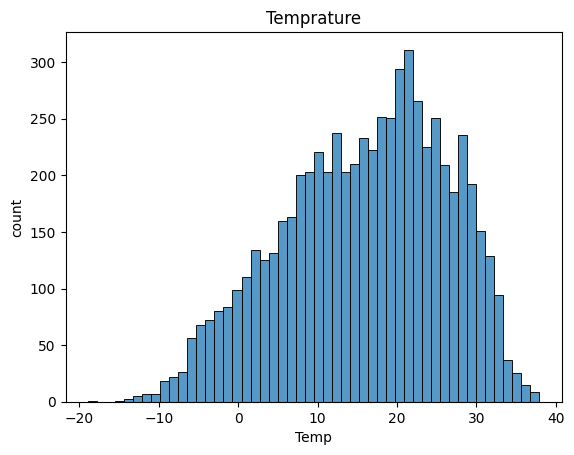

In [172]:
sns.histplot(x=df['Temp'],bins=50)
plt.title("Temprature")
plt.ylabel("count")
plt.show()

In [88]:
temp_range=np.linspace(min(df['Temp']) , max(df['Temp']) , 4)
temp_range

array([-1.89000000e+01,  3.33333333e-02,  1.89666667e+01,  3.79000000e+01])

In [94]:
def temp_bin(value):
    if(value<temp_range[1]):
        return 'low'
    elif(value>=temp_range[1] and value<temp_range[2]):
        return 'moderate'
    else:
        return 'high'

df['temp_binned']=df['Temp'].apply(temp_bin)
    

Text(0.5, 1.0, 'binned value of temprature range')

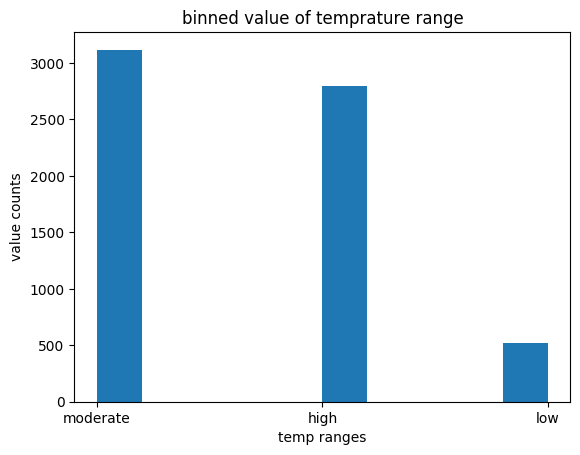

In [114]:
plt.hist(df['temp_binned'])
plt.xlabel('temp ranges')
plt.ylabel('value counts')
plt.title('binned value of temprature range')

In [104]:
df['temp_binned'].value_counts()

temp_binned
moderate    3118
high        2800
low          517
Name: count, dtype: int64

## Exploratory Data Analysis

In [106]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                     int32
Temp                   float64
Month_Year              object
temp_binned             object
dtype: object

In [108]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Fuel_Price', 'CPI',
       'Unemployment', 'Year', 'Temp', 'Month_Year', 'temp_binned'],
      dtype='object')

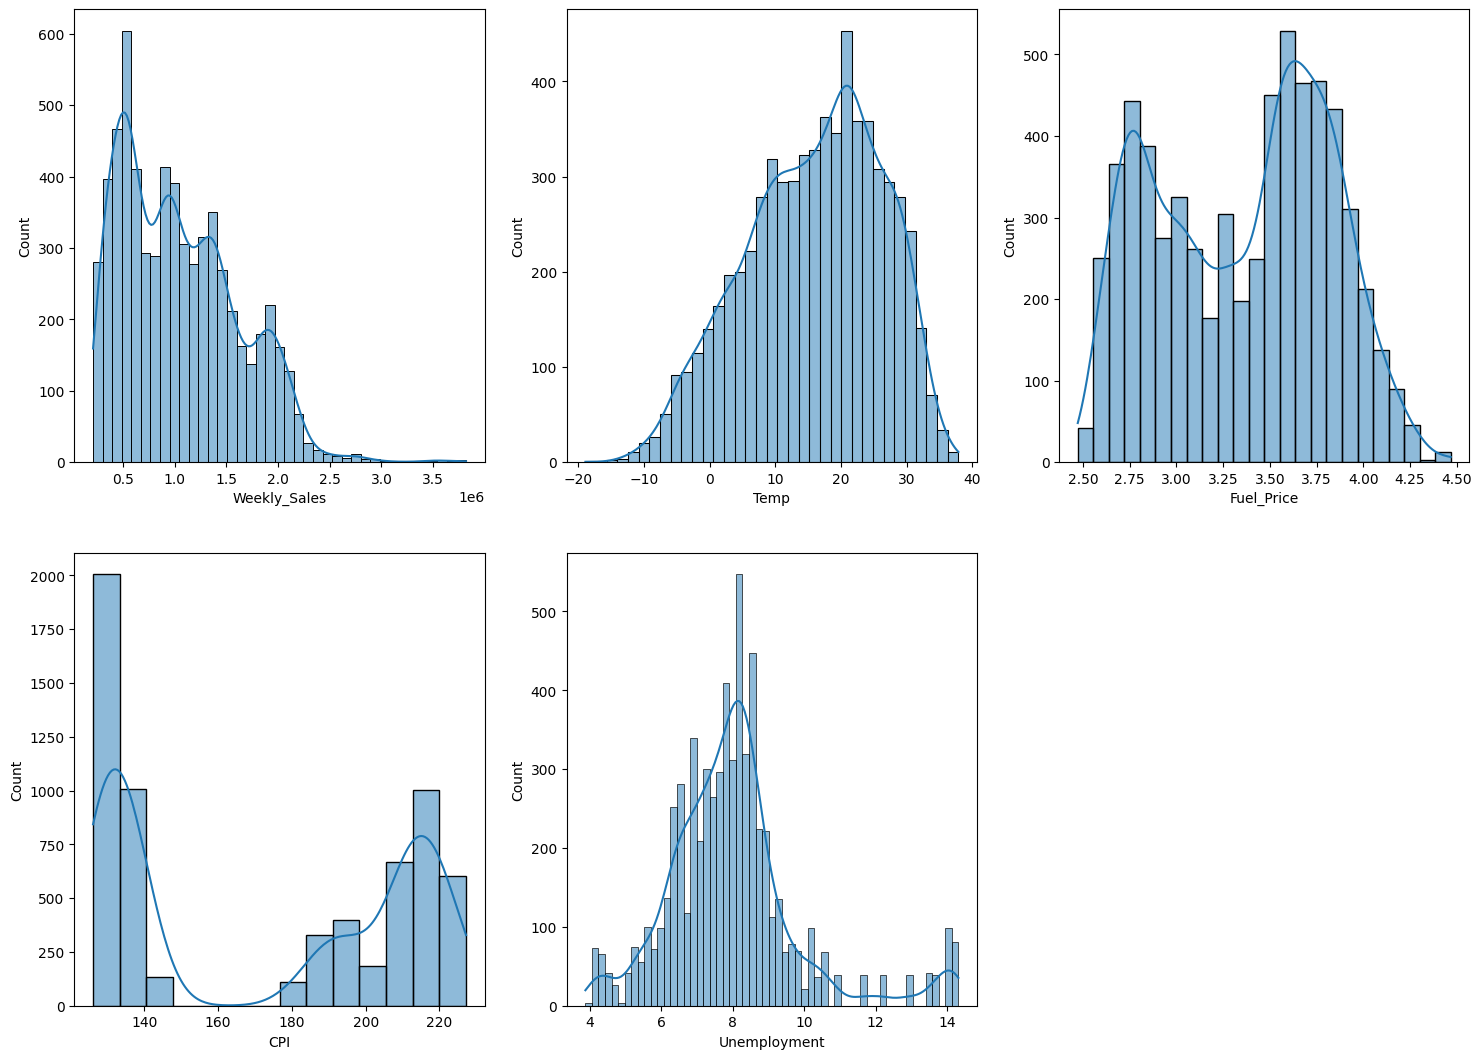

In [162]:
features = ['Weekly_Sales', 'Temp', 'Fuel_Price', 'CPI', 'Unemployment']


plt.figure(figsize=(18, 20))


for i, col in enumerate(features):
   
    plt.subplot(3, 3, i+1)
    
    sns.histplot(data=df, x=col , kde = True)

plt.show()

In [161]:
# fig = plt.figure(figsize=(8,10)) # create figure

# ax0 = fig.add_subplot(2, 2, 1) 
# ax1 = fig.add_subplot(2, 2, 2) 
# ax2 = fig.add_subplot(2, 2, 3) 
# ax3 = fig.add_subplot(2, 2, 4) 

# ax0.hist(df['Temp'],50)
# ax0.set_title('Temp')
# ax1.hist(df['Fuel_Price'],50)
# ax1.set_title('Fuel price')


# ax2.hist(df['Weekly_Sales'],50)
# ax3.hist(df['CPI'],50)
# plt.show()

In [111]:
df_corr =df[['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Fuel_Price', 'CPI',
       'Unemployment', 'Year', 'Temp']].corr()
df_corr



,Store,Date,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Year,Temp
Store,1.000000e+00,1.577299e-13,-0.335332,-4.386841e-16,0.060023,-0.209492,0.223531,3.474318e-12,-0.022645
Date,1.577299e-13,1.000000e+00,0.006949,-1.328524e-02,0.771444,0.077157,-0.248203,9.416680e-01,0.145369
Weekly_Sales,-3.353320e-01,6.949360e-03,1.000000,3.689097e-02,0.009464,-0.072634,-0.106176,-1.837754e-02,-0.063781
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036891,1.000000e+00,-0.078347,-0.002162,0.010960,-5.678257e-02,-0.155148
Fuel_Price,6.002295e-02,7.714439e-01,0.009464,-7.834652e-02,1.000000,-0.170642,-0.034684,7.794703e-01,0.145004
CPI,-2.094919e-01,7.715746e-02,-0.072634,-2.162091e-03,-0.170642,1.000000,-0.302020,7.479573e-02,0.176906
Unemployment,2.235313e-01,-2.482029e-01,-0.106176,1.096028e-02,-0.034684,-0.302020,1.000000,-2.418135e-01,0.101172
Year,3.474318e-12,9.416680e-01,-0.018378,-5.678257e-02,0.779470,0.074796,-0.241813,1.000000e+00,0.064293
Temp,-2.264458e-02,1.453694e-01,-0.063781,-1.551484e-01,0.145004,0.176906,0.101172,6.429315e-02,1.000000


<Axes: >

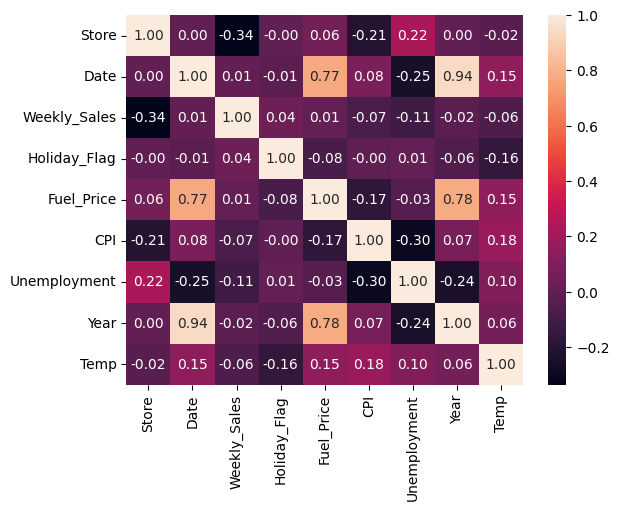

In [166]:
sns.heatmap(df_corr, annot=True, fmt=".2f")

### We can see that
- Accouring to heatmap Weekly sales has a positive correlation with CPI and Fuel prices

In [144]:
from scipy import stats

In [141]:
df[[ 'Weekly_Sales', 'Holiday_Flag', 'Fuel_Price', 'CPI',
       'Unemployment', 'Year','Month' ,'Temp']]

,Weekly_Sales,Holiday_Flag,Fuel_Price,CPI,Unemployment,Year,Month,Temp
0,1643690.90,0,2.572,211.096358,8.106,2010,2,5.7
1,1641957.44,1,2.548,211.242170,8.106,2010,2,3.6
2,1611968.17,0,2.514,211.289143,8.106,2010,2,4.4
3,1409727.59,0,2.561,211.319643,8.106,2010,2,8.1
4,1554806.68,0,2.625,211.350143,8.106,2010,3,8.1
...,...,...,...,...,...,...,...,...
6430,713173.95,0,3.997,192.013558,8.684,2012,9,18.3
6431,733455.07,0,3.985,192.170412,8.667,2012,10,18.3
6432,734464.36,0,4.000,192.327265,8.667,2012,10,12.5
6433,718125.53,0,3.969,192.330854,8.667,2012,10,13.6


In [168]:

list1=['Weekly_Sales', 'Holiday_Flag', 'Fuel_Price', 'CPI',
       'Unemployment', 'Year','Month' ,'Temp']
for i in list1:
    pearson_coef, p_value = stats.pearsonr(df[i] , df['Weekly_Sales'])
    print( i , "with Weekly_Sales ")
    print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 
    print("" )

Weekly_Sales with Weekly_Sales 
The Pearson Correlation Coefficient is 0.9999999999999998  with a P-value of P =  0.0

Holiday_Flag with Weekly_Sales 
The Pearson Correlation Coefficient is 0.036890968010414124  with a P-value of P =  0.003078699263818924

Fuel_Price with Weekly_Sales 
The Pearson Correlation Coefficient is 0.00946378631447513  with a P-value of P =  0.44782874894858105

CPI with Weekly_Sales 
The Pearson Correlation Coefficient is -0.07263416204017628  with a P-value of P =  5.438292612176736e-09

Unemployment with Weekly_Sales 
The Pearson Correlation Coefficient is -0.10617608965795415  with a P-value of P =  1.3448365210234661e-17

Year with Weekly_Sales 
The Pearson Correlation Coefficient is -0.01837754259892585  with a P-value of P =  0.14046648842649562

Month with Weekly_Sales 
The Pearson Correlation Coefficient is 0.07614331979236562  with a P-value of P =  9.607838869240764e-10

Temp with Weekly_Sales 
The Pearson Correlation Coefficient is -0.0637811670847

## Due Work
- More viz
- Model development


## Made by-

<h3><a href="https://www.linkedin.com/in/prasun-maltare-94273a229/" target="_blank">Prasun Maltare</a></h3>




## Change Log


|  Date (YYYY-MM-DD) |   Change Description                   |
|--------------------|----------------------------------------|
| 2024-02-01         |Updated to work with data csv file  |    




## <h3 align="center"> Thank you! <h3/>